## Program NO.3 : Implement decision tree-based algorithm and and Build a Tree and Make a Prediction using any Dataset.

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import * 
%matplotlib inline

In [26]:
df= pd.read_csv("houseprices-1.csv")

In [3]:
df.head(5)

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [4]:
df.describe(include='all')#desciption of statistical values in data

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,163862.125119,1807.302770,1.918338,3.183381,0.569580,28.061127,0.593123
std,67651.558917,641.460916,0.641735,0.750265,0.777879,34.900899,0.491486
min,16858.000000,672.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,112014.000000,1336.000000,1.500000,3.000000,0.210000,6.000000,0.000000
50%,151917.000000,1672.000000,2.000000,3.000000,0.390000,18.000000,1.000000
75%,205235.000000,2206.000000,2.500000,4.000000,0.600000,34.000000,1.000000
max,446436.000000,4534.000000,4.500000,6.000000,9.000000,247.000000,1.000000


<AxesSubplot:>

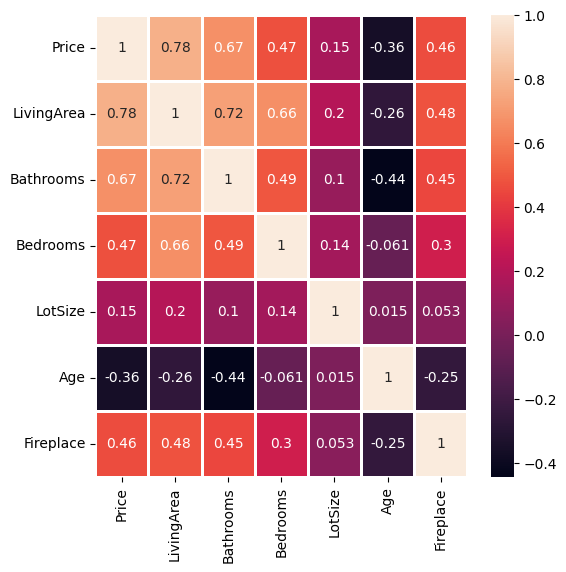

In [7]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(np.round(df.corr(),3),annot=True,linewidths=.9)

<AxesSubplot:>

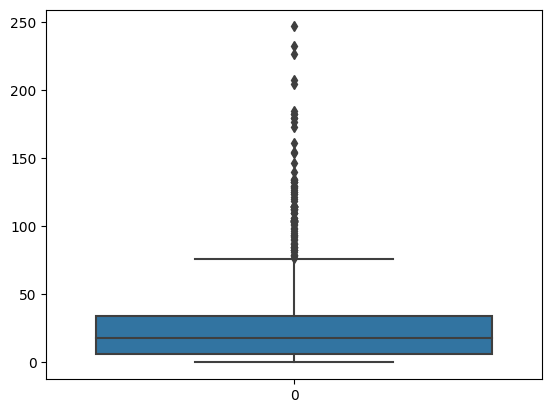

In [8]:
sns.boxplot(data=df["Age"])

In [9]:
#there's a lot of outliers so going for IQR

### Handling outliers

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


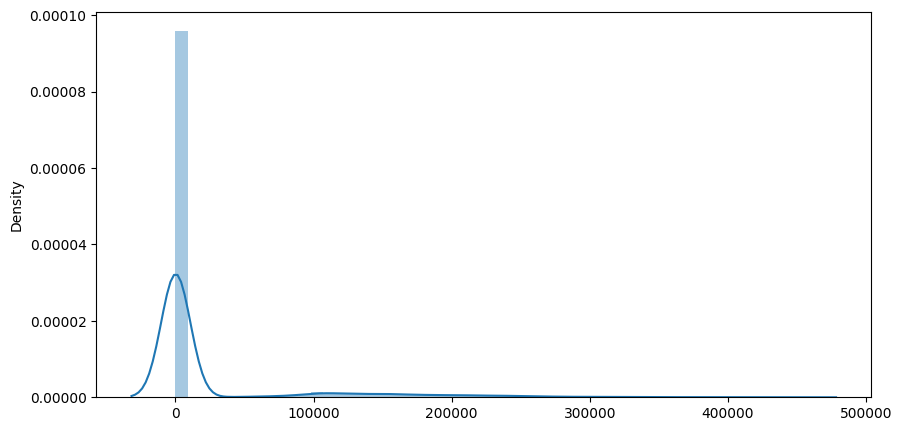

In [21]:
plt.figure(figsize=(10,5))
plt.subplot()
sns.distplot(df) #Distribution plot : How data is distributed
plt.show()

In [27]:
Q1 = df.quantile(0.25)  #25%
Q3 = df.quantile(0.75) #75%
IQR = Q3 - Q1        #50%

In [28]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_iqr.reset_index(inplace=True)

df_iqr.drop('index',axis=1, inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [30]:
X=df_iqr.drop("Price",axis=1)
y=df_iqr["Price"]

In [31]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(650, 6)
(650,)
(217, 6)
(217,)


# Decision tree

In [33]:
parameter={
    'criterion':['mse','mae'],
    'max_depth':[2,3,4,5,6,7,8,9,None],
}

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [37]:
from sklearn.tree import DecisionTreeRegressor
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=parameter)

In [38]:
grid.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in vers

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None]})

In [39]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 4}

In [40]:
grid.best_score_

0.6440437012200037

In [41]:
reg= DecisionTreeRegressor(criterion='mse',max_depth=4)

In [42]:
reg.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4)

In [43]:
y_pred=reg.predict(X_test)

In [44]:
r2_score(y_test,y_pred)

0.6389861823331621

In [49]:
from sklearn import tree
plt.figure(figsize=(150,80))
tree.plot_tree(reg,filled=True)

[Text(0.5, 0.9, 'X[0] <= 0.201\nmse = 3486489454.918\nsamples = 650\nvalue = 162391.309'),
 Text(0.25, 0.7, 'X[0] <= -0.66\nmse = 1436057965.708\nsamples = 408\nvalue = 130535.446'),
 Text(0.125, 0.5, 'X[0] <= -1.236\nmse = 836976263.45\nsamples = 189\nvalue = 110328.931'),
 Text(0.0625, 0.3, 'X[0] <= -1.604\nmse = 621224010.559\nsamples = 64\nvalue = 94993.438'),
 Text(0.03125, 0.1, 'mse = 459397529.84\nsamples = 5\nvalue = 68510.6'),
 Text(0.09375, 0.1, 'mse = 570465548.495\nsamples = 59\nvalue = 97237.746'),
 Text(0.1875, 0.3, 'X[4] <= 2.586\nmse = 765380268.912\nsamples = 125\nvalue = 118180.704'),
 Text(0.15625, 0.1, 'mse = 558897677.203\nsamples = 118\nvalue = 115923.983'),
 Text(0.21875, 0.1, 'mse = 2713053258.245\nsamples = 7\nvalue = 156222.571'),
 Text(0.375, 0.5, 'X[4] <= -0.414\nmse = 1296601137.778\nsamples = 219\nvalue = 147973.945'),
 Text(0.3125, 0.3, 'X[3] <= -1.094\nmse = 973392891.32\nsamples = 64\nvalue = 167327.734'),
 Text(0.28125, 0.1, 'mse = 1200476363.556\nsamp